Test the validation schema

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datajoint as dj 
import model_validation_schema as sk

%matplotlib inline
%load_ext autoreload
%autoreload 2

DataJoint 0.6.0 (March 8, 2017)
No config file found, using default settings.
Connecting shuang@10.28.3.113:3306


In [2]:
# sk.schema.drop()

In [3]:
# import inspect
# inspect.getsourcelines(sk)

In [4]:
# sk.schema.jobs.drop()

In [5]:
sk.ModelSelection().populate(reserve_jobs=True)

Populating {'lr_id': 1, 'l2_id': 0, 'dataset_id': 2, 'iterations': 5, 'network_id': 1, 'random_start': 0, 'l1_id': 0, 'seed': 0}

Initial validation cost=12.99224
Global Step 0150 and Step 0150: validation cost=0.77931
Updated min validation loss!Saving model...
Global Step 0200 and Step 0200: validation cost=0.48794
Updated min validation loss!Saving model...
Global Step 0250 and Step 0250: validation cost=0.33574
Updated min validation loss!Saving model...
Global Step 0300 and Step 0300: validation cost=0.24620
Updated min validation loss!Saving model...
Global Step 0350 and Step 0350: validation cost=0.18868
Updated min validation loss!Saving model...
Global Step 0400 and Step 0400: validation cost=0.14955
Updated min validation loss!Saving model...
Global Step 0450 and Step 0450: validation cost=0.12174
Updated min validation loss!Saving model...
Global Step 0500 and Step 0500: validation cost=0.10109
Updated min validation loss!Saving model...
Global Step 0550 and Step 0550: valid

In [6]:
sk.ModelSelection().progress()

ModelSelection       Completed 6 of 6 (100.0%)   2018-02-02 03:40:27


(0, 6)

In [7]:
sk.ModelSelection()

network_id l1 regularization id,dataset_id l1 regularization id,l1_id l1 regularization id,l2_id l1 regularization id,iterations number of iterations,lr_id,"random_start 1 if random start, 0 if start from ground truth, seed is ignored when 0",seed random seed,val_error mse on validation set,val_loss total loss on validation set,pre_kernel calculated attribute,scale calculated attribute,post_post_kernel calculated attribute,post_kernel calculated attribute
0,0,0,0,5,1,0,0,6.9108e-15,7.01242e-15,=BLOB=,=BLOB=,=BLOB=,=BLOB=
0,1,0,0,5,1,0,0,1.46601e-15,1.47879e-15,=BLOB=,=BLOB=,=BLOB=,=BLOB=
0,2,0,0,5,1,0,0,3.92774e-16,5.54893e-16,=BLOB=,=BLOB=,=BLOB=,=BLOB=
1,0,0,0,5,1,0,0,6.57126e-16,6.66491e-16,=BLOB=,=BLOB=,=BLOB=,=BLOB=
1,1,0,0,5,1,0,0,2.83218e-13,7.51116e-13,=BLOB=,=BLOB=,=BLOB=,=BLOB=
1,2,0,0,5,1,0,0,1.15298e-12,1.16691e-12,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [10]:
df = sk.ModelSelection()&('network_id=1')&('dataset_id=2')
pre_ker= df.fetch['pre_kernel']
post_ker= df.fetch['post_kernel']
post_post_ker= df.fetch['post_post_kernel']

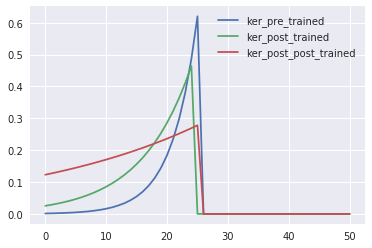

In [13]:
plt.plot(np.abs(pre_ker[0]),  label='ker_pre_trained')
plt.plot(np.abs(post_ker[0]),  label='ker_post_trained')
plt.plot(np.abs(post_post_ker[0]), label='ker_post_post_trained')
plt.legend()